# **Statistical Thinking (Part 1)**

As rule of thumb use keep the number of bins equal to the number of observations for histograms.

## Covariance & Pearson Correlation

$$cov(x,y) = \frac{1}{n}\sum_{i=1}^{n}{(x_{i} - \bar{x})(y_{i} - \bar{y})}$$

To make covariance dimensionless, we divide covarience with standard deviations of $x$ and $y$, which gives us a Pearson correlation coefficient ($\rho$):

$$\rho = \frac{cov(x,y)}{std(x)*std(y)}$$

## Hacker Statistics
### Random number generators 

#### Bernoulli Trial
* An experiment that has two options, "success" (True), and "failure" (False).

Simulating 4 coin flips

In [2]:
import numpy as np
np.random.seed(42)

random_numbers = np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [2]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False])

In [3]:
np.sum(heads)

1

**What is the probabilty of getting 4 heads in succession?**

Probability of getting a head is $P(H) = 0.5$.  

Therefore, to get probability of getting 4 heads in succession, we simply need to
multiply the probabilities of getting a head four times. 

$$P(H,H,H,H) = 0.5^4 = 0.0625$$

This is a theoretical solutions which was rather easy to compute. But real world problems are far more complex and it very difficult to estimate probabilites. 

Therefore, we will leverage high computation resources at our disposal to do some hacker statistics and compute the probability for $P(H,H,H,H)$.

In [43]:
n_all_heads = 0 # Initialize number of 4-heads trails 
n = 100000 # Total number of repetitions
for _ in range(n):
    heads = np.random.random(size=4) < 0.5
    n_heads  = np.sum(heads)
    if n_heads == 4:
        n_all_heads+=1
        
print('P(H,H,H,H):',n_all_heads/n)

P(H,H,H,H): 0.06264


Indeed! as we repeatedly carry out the experiment over and over, we get a $P(H,H,H,H)$ that is very close to the theoretical probability.

### **The np.random module and Bernoulli trials**
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [44]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1
    return n_success

In [45]:
perform_bernoulli_trials(10000,0.5)

5035

### **The Binomial distribution**

#### Probability mass function (PMF)
* The set of probabilities of discrete outcomes

#### Discrete Uniform distribution: the story
The outcome of rolling a single fair die is
- Discrete
- Uniformly distributed


#### Binomial distribution: the story
- The number *r* of successes in n Bernoulli trials with probability p of success, is Binomially distributed
- The number *r* of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed

#### Sampling from a Binomial distribution

In [48]:
np.random.binomial(4,0.5)

3

That is 3 heads out of 4 coin flips.

Lets repeate this 4-flip experiment 10 times.

In [49]:
np.random.binomial(4,0.5,size=10)

array([2, 2, 2, 1, 1, 4, 2, 3, 1, 2])

In first, second and third experiments, we got 2 heads out of 4 flips and so on.

### **The Poisson process**
- The timing of the next event is completely independent of when the previous event happened.

#### Examples of Poisson processes
- Natural births in a given hospital
- Hit on a website during a given hour
- Meteor strikes 
- Molecular collisions in a gas
- Aviation incidents
- Buses in Poissonville

### **Poisson distribution**
- The number *r* of arrivals of a Poisson process in a given time interval with average rate of? arrivals per interval is Poisson distributed.

- The number *r* of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.

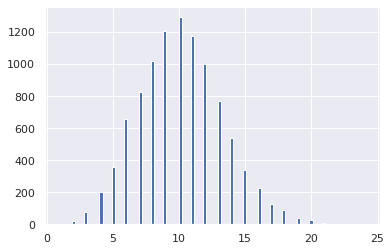

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

_=plt.hist(np.random.poisson(10,10000),bins=int(np.sqrt(10000)))

### Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

* Draw 10000 samples from a Poisson distribution with a mean of 251/115 and assign to n_nohitters.
* Determine how many of your samples had a result greater than or equal to 7 and assign to n_large.
* Compute the probability, p_large, of having 7 or more no-hitters by dividing n_large by the total number of samples (10000).
* Hit 'Submit Answer' to print the probability that you calculated.

In [58]:
n_nohitters = np.random.poisson(251/115,size=10000)

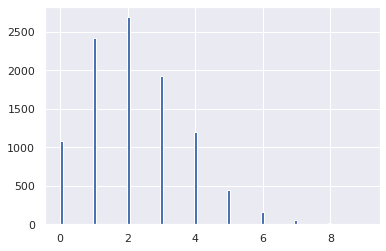

In [60]:
_=plt.hist(n_nohitters,bins=int(np.sqrt(len(n_nohitters))))

In [61]:
n_large = (n_nohitters >= 7).sum()

In [63]:
p_large = n_large/10000
p_large

0.0074

## Continous Distribution
### Normal Distribution
- I already have good idea about it, so no notes needed


### Exponential Distribution
- The waiting time between arrivals of a Poisson process is Exponentially distributed
- For example: it can model waiting times between rare events 

# **Statistical Thinking (Part 2)**

## Optimal parameters
- Parameter values that bring the model in closest agreement with the data.

## Hypothesis testing using Permutation
Assumption: two quantities are identically distributed.

The null hypothesis ($H_{0}$) is that both groups come from the same distribution.

$$H_{0}: \mu_{1} = \mu_{2}$$
$$H_{1}: \mu_{1} \neq \mu_{2}$$

Therefore, we need to simulate the $H_{0}$ distribution as follow:
1. Concatenate the data of both groups in single array
2. Scramble the array using np.permutation 
3. Split the scrambled array into groups 
4. Compute test statistic for each group, take their difference and store the value in an array.
5. Repeat 1-4 10000 times to generate a $H_{0}$ distribution.

In [16]:
## Functions to simulate null hypothesis (permutation replicates) 
## that two groups are not dufferent.

def permutation_sample(data1,data2):
    """Generate a permutation sample from two datasets."""
    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_rep(data1,data2,func,size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data1,data2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
    return perm_replicates
    

## Hypothesis testing using Bootstrapping
Assumption: Does NOT assume that the two quantities have identical distributed.

The null hypothesis ($H_{0}$) is that both groups have same means.

$$H_{0}: \mu_{1} = \mu_{2}$$
$$H_{1}: \mu_{1} \neq \mu_{2}$$

Therefore, we need to simulate the $H_{0}$ distribution as follow:
1. Concatenate the data of both groups in single array
2. Compute the common mean
3. Shift data of each group to the common mean (this preserves the unique variance of each group, only means are shifted).
4. Generate bootstrap replicates for each group separately
5. Subtract the bootstrap replicates
6. Get the p-value one from the distribution of the subtract the bootstrap replicates

When to use two-sample bootstrap vs. a permutation test?

## **A/B testing**
### **Null hypothesis of an A/B test**
* The test statistic is impervious to the changes.

**The vote for the Civil Rights Act in 1964**  
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

* Construct Boolean arrays, dems and reps that contain the votes of the respective parties; e.g., dems has 153 True entries and 91 False entries.
* Write a function, frac_yea_dems(dems, reps) that returns the fraction of Democrats that voted yea. The first input is an array of Booleans, Two inputs are required to use your draw_perm_reps() function, but the second is not used.
* Use your draw_perm_reps() function to draw 10,000 permutation replicates of the fraction of Democrat yea votes.
* Compute and print the p-value.

## **Test of correlation**
### **Hypothesis test of correlation**

* Posit null hypothesis: the two variables are completely uncorrelated
* Simulate data assuming null hypothesis is true